In [301]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import time

%matplotlib inline 

In [2]:
path_to_data = '/mnt/storage/HRV/data_atfer_Nekit_skripts/'
path_to_3d_signal = '/mnt/storage/HRV/3d-signal/'

In [ ]:
files = os.listdir(path_to_3d_signal)

In [ ]:
start = time.clock()

for file_i, file_ in enumerate(files[:]):
    print (file_i, file_)
    if file_[-3] == '1':
        frequency = 125
    if file_[-3] == 'A':
        frequency = 1000
        
    if os.path.isfile(path_to_data + "R-T_code_with_markup/" + file_[:-4] + '.npy'):
        print ('find code for', file_)
        continue
        
    with open(path_to_data + 'filtered/' + file_[:-4] + '_filtered' + file_[-4:], 'rb') as f: 
        data = np.fromfile(f, np.int16)
    
    path_to_markup = path_to_data + 'markup/' + file_[:-4] + '_filtered_markup.csv'
    if os.path.isfile(path_to_markup):
        markup = np.loadtxt(path_to_markup)
    else:
        print ('can\'t find markup for', file_)
        continue

    markup_mode = []
    T = (markup[1:] - markup[:-1])*1000/frequency
    R = []
    for i_i, i in enumerate(markup):
        for j in range(100):
            if j == 99:
#                 print ('bad markup', i)
                R.append(0)
                break
            if (np.hstack((data[i-j+1:i-j+3] > data[i-j], data[i-j-2:i-j] >= data[i-j]))).all():
                if data[i]-data[i-j] < 10:
                    continue
                R.append(data[i]-data[i-j])
                break
#         if i_i == 0:
#             markup_mode.append(1)
#         elif i == markup[-1]:
#             if R[-1] > 100 and R[-1] < 800 and  T[i_i-1] > 200 and T[i_i-1] < 2000\
#             and T[i_i - 1]/T[i_i - 2] > 0.8 and T[i_i - 1]/T[i_i - 2] < 1.2:
#                 markup_mode.append(1)
#             else:
#                 markup_mode.append(0)
#         else:
#             if T[i_i-1] > 200 and T[i_i-1] < 2000 \
#             and R[-1] > 100 and R[-1] < 800 \
#             and T[i_i]/T[i_i - 1] > 0.8 and T[i_i]/T[i_i - 1] < 1.2:
#                 markup_mode.append(1)
#             else:
#                 markup_mode.append(0)
        

    R = R[:-1]
    
    np.save(path_to_data + 'R-T_code_with_markup/' + file_[:-4], np.vstack((np.vstack((R, T)))))
        
print ('time', np.round(time.clock() - start))

0 310240.A53
find code for 310240.A53
1 412316.A53
find code for 412316.A53
2 510901.A53
find code for 510901.A53
3 110270.A53
find code for 110270.A53
4 110280.A53
find code for 110280.A53
5 110303.A53
find code for 110303.A53
6 110307.A53
find code for 110307.A53
7 110314.A53
find code for 110314.A53
8 110318.A53
find code for 110318.A53
9 110357.A53
find code for 110357.A53
10 110477.A53
find code for 110477.A53
11 110520.A53
find code for 110520.A53
12 110552.153
find code for 110552.153
13 110579.A53
find code for 110579.A53
14 110664.A53
find code for 110664.A53
15 110700.A52
find code for 110700.A52
16 110723.A53
find code for 110723.A53
17 110760.A53
find code for 110760.A53
18 110784.A53
find code for 110784.A53
19 110788.A52
find code for 110788.A52
20 110797.A53
find code for 110797.A53
21 110806.A53
find code for 110806.A53
22 221380.A53
find code for 221380.A53
23 221381.A53
find code for 221381.A53
24 221382.A52
find code for 221382.A52
25 221383.A52
find code for 221383.

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:33: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [ ]:
max_good_signal = []
for file_ in files[:]:
    
    data = np.load(path_to_data + 'R-T_code_with_markup/' + file_)
    markup = data[2]
    bad_markup = np.array(range(len(markup)))[np.array(markup) == 'X']
    max_good_signal.append(max(bad_markup[1:] - bad_markup[:-1]))
    
    if max(bad_markup[1:] - bad_markup[:-1]) < 10:
        print (file_)

In [141]:
start = time.clock()

for file_i, file_ in enumerate(files[:1]):
    print (file_i, file_)
    if file_[-3] == '1':
        frequency = 125
    if file[-3] = 'A':
        frequency = 1000
    if os.path.isfile(path_to_data + "R-T_code/" + file_[:-4] + '.npy'):
        print ('find code for', file_)
        continue
    with open(path_to_data + 'filtered/' + file_[:-4] + '_filtered' + file_[-4:], 'rb') as f: 
        data = np.fromfile(f, np.int16)
    
    path_to_markup = path_to_data + 'markup/' + file_[:-4] + '_filtered_markup.csv'
    if os.path.isfile(path_to_markup):
        markup = np.loadtxt(path_to_markup)
    else:
        #print ('can\'t find markup for', file_)
        continue

    
    T = markup[1:] - markup[:-1]
    R = []
    for i in markup[:1100]:
        for j in range(100):
            if j == 99:
#                 print ('bad markup', i)
                R.append(0)
                break
            if (np.hstack((data[i-j+1:i-j+3] > data[i-j], data[i-j-2:i-j] >= data[i-j]))).all():
                if data[i]-data[i-j] < 10:
                    continue
                R.append(data[i]-data[i-j])
                break
        
    print (len(markup))
    
    
    R = np.array(R[:-1])
    iSelected = T > frequency / 5
    R = R[iSelected]
    T = T[iSelected]
    print (len(T))
    
    iSelected = T < frequency * 2
    R = R[iSelected]
    T = T[iSelected]
    print (len(T))

    iSelected = R > 0
    R = R[iSelected]
    T = T[iSelected]
    print (len(R))
    
    R_R = R
    iSelected = R > 0
    R = R[iSelected]
    T = T[iSelected]
    print (len(R))
    
    

    np.save(path_to_data + 'R-T_code/' + file_[:-4], np.vstack((R, T)))

    
#     a = np.arctan(R/T)
#     dT = T[1:] - T[:-1]
#     dR = R[1:] - R[:-1]
#     da = a[1:] - a[:-1]
#     trigram = []
#     for i, dt in enumerate(dT):
#         if R[i] <= 0 or R[i+1] <= 0:
#             print ('RRRRRRRrR', i, R[i], markup[i], T[i])
#             continue
#         elif dt > 0 and dR[i] > 0 and da[i] > 0:
#             trigram.append('A')
#         elif dt <= 0 and dR[i] <= 0 and da[i] > 0:
#             trigram.append('B')
#         elif dt <=0 and dR[i] > 0 and da[i] > 0:
#             trigram.append('C')
#         elif dt > 0 and dR[i] <= 0 and da[i] <= 0:
#             trigram.append('D')
#         elif dt > 0 and dR[i] > 0 and da[i] <= 0:
#             trigram.append('E')
#         elif dt <= 0 and dR[i] <= 0 and da[i] <= 0:
#             trigram.append('F')
#         elif T[i] ==  0 or T[i+1] == 0:
#             continue
#         else:
#             print ('ups...', i, 'dt', dt, 'dR', dR[i], 'da', da[i])

#     fld = open(path_to_data + "code_string/" + file_[:-4] + '.txt', "w")
#     fld.write(''.join(trigram))
#     fld.close()
        
print ('time', np.round(time.clock() - start))

0 310240.A53


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:28: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:30: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1100
1100
1 412316.A53
1100
1100
2 510901.A53
1100
1100
3 110270.A53
1100
1100
4 110280.A53
1100
1099
5 110303.A53
1100
1100
6 110307.A53
1100
1066
7 110314.A53
1100
1100
8 110318.A53
1100
1100
9 110357.A53
1100
1100
10 110477.A53
1100
1100
11 110520.A53
1100
1100
12 110552.153
11
11
13 110579.A53
1100
1100
14 110664.A53
1100
1100
15 110700.A52
1100
1099
16 110723.A53
1100
1100
17 110760.A53
1100
1100
18 110784.A53
1100
1100
19 110788.A52
1100
1100
20 110797.A53
1100
1100
21 110806.A53
1100
1100
22 221380.A53
1100
1099
23 221381.A53
1100
1100
24 221382.A52
1100
1100
25 221383.A52
1100
1100
26 221384.A53
1100
1100
27 221385.A53
1100
1100
28 221386.A53
1100
1100
29 221387.A53
1100
1098
30 221390.A53
1100
1087
31 221392.A53
1100
1100
32 221393.A53
1100
1100
33 221394.A53
1100
1100
34 221395.A53
1100
1100
35 221398.A53
1100
1100
36 221399.A53
1100
1100
37 221407.A53
1100
1100
38 221412.A53
1100
1100
39 221413.A53
1100
1100
40 221415.A53
1100
1096
41 221417.A53
1100
1100
42 221418.A53
1100


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:28: RuntimeWarning: overflow encountered in short_scalars


1100
1098
566 321113.A53
1100
1100
567 321114.A53
1100
1100
568 321116.A52
1100
1098
569 321131.A53
1100
1100
570 321145.A53
1100
1100
571 321151.A53
1100
1100
572 321156.A53
1100
1100
573 321168.A53
1100
1100
574 321179.A53
1100
1100
575 321181.A53
1100
1100
576 320994.A53
1100
1100
577 320998.A53
1100
1100
578 321001.A53
1100
1100
579 321002.A53
1100
1100
580 321003.A53
1099
1098
581 321013.A53
1100
1100
582 321015.A53
1100
1094
583 321021.A53
1100
1100
584 321023.A53
1100
1099
585 321025.A52
1100
1100
586 321045.A53
1100
1100
587 321048.A53
1100
1099
588 321049.A53
1100
1100
589 321052.A53
1100
1100
590 321055.A53
1100
1100
591 321056.A53
1100
1100
592 321059.A53
1100
1100
593 321060.A53
1100
1100
594 320912.A53
1100
1100
595 320917.A53
1100
1100
596 320920.A53
1100
1100
597 320931.A53
1100
1100
598 320940.A53
1100
1100
599 320941.A53
1100
1100
600 320942.A53
1100
1100
601 320953.A53
1100
1100
602 320958.A53
1100
1100
603 320961.A53
1100
1100
604 320963.A52
1100
1089
605 320964.A53


In [140]:
len(R)

1100

In [ ]:
#!!!!!!!!!!!!!!!412316

In [112]:
with open(path_to_data + 'filtered/' + files[0][:-4] + '_filtered' + file_[-4:], 'rb') as f: 
    data = np.fromfile(f, np.int16)
    
path_to_markup = path_to_data + 'markup/' + files[0][:-4] + '_filtered_markup.csv'
if os.path.isfile(path_to_markup):
    markup = np.loadtxt(path_to_markup)
    
T = markup[1:] - markup[:-1]
R = []
for i in markup:
    for j in range(100):
        if (np.hstack((data[i-j+1:i-j+3] > data[i-j], data[i-j-2:i-j] >= data[i-j]))).all():
            if data[i]-data[i-j] < 10:
                continue
            R.append(data[i]-data[i-j])
            break
    if j == 99:
#             print ('bad markup', i)
        R.append(0)
#             R.append(data[i]-min(data[i-j:i]))

markup_y = [data[i] for i in markup]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


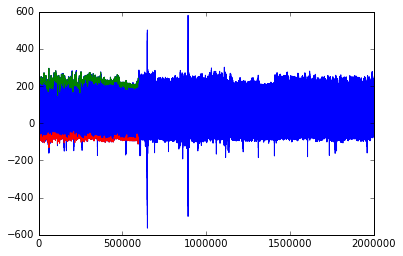

In [117]:
plt.plot(data[:2000000])
plt.plot(markup[:1000], markup_y[:1000])
plt.plot(markup[:1000], np.array(markup_y[:1000]) - np.array(R[:1000]))

In [100]:
R = np.array(R[:-1])
# iSelected = T > 100
# R = R[iSelected]
# T = T[iSelected]
print (len(T))

# iSelected = R > 0
# R = R[iSelected]
# T = T[iSelected]
print (len(T))

a = np.arctan(R/T)
dT = T[1:] - T[:-1]
dR = R[1:] - R[:-1]
da = a[1:] - a[:-1]

116632
116632


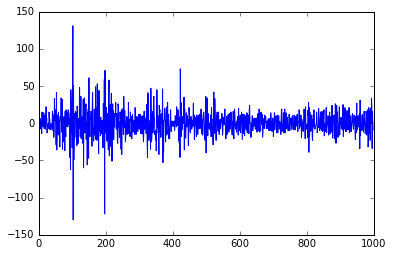

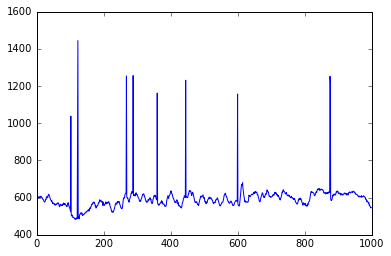

In [103]:
plt.plot(dR[:1000])
plt.show()
plt.plot(T[:1000])
plt.show()

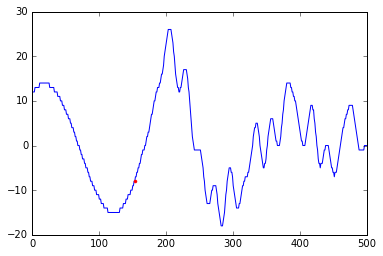

In [48]:
#смотреть ошибки разметки - разкоментировать строку 29 выше. 

plt.plot(data[13184000:13184500])
plt.plot(13184153-13184000, data[13184153], '.', c = 'r')
# plt.plot(75264346.0-75264000, data[75264346.0], '.', c = 'r')
# plt.plot(75264959.0-75264000, data[75264959.0], '.', c = 'r')

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


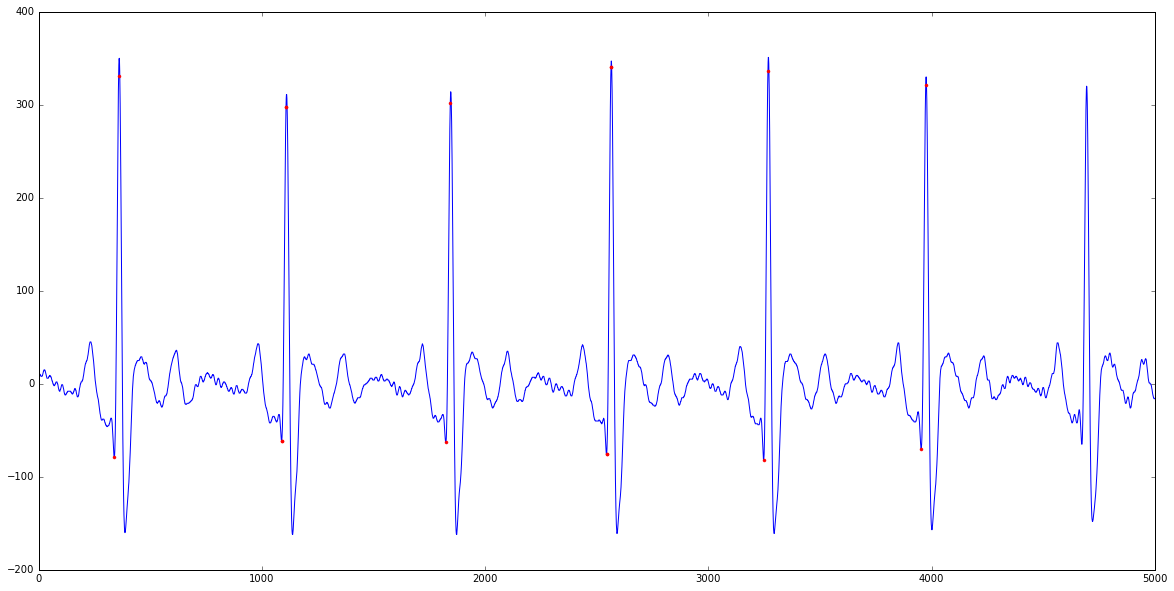

In [43]:
#смотреть как ищется минимум для подсчета R

plt.rcParams['figure.figsize'] = (20,10)

begin = 5000
end = 5000*2

plt.plot(data[begin:end])

for i in markup[int(begin/600):int(end/600)]:
    plt.plot(i - begin, data[i], '.', c = 'r')
    for j in range(50):
#         print (data[i-j-2:i-j+3, 0])
        if (np.hstack((data[i-j+1:i-j+3] >= data[i-j], data[i-j-2:i-j] >= data[i-j]))).all():
#             print (data[i-j-2:i-j+3, 0])
            break
    index_may_be = i-j
    plt.plot(index_may_be-begin, data[index_may_be], '.', c = 'r')
plt.show()